# **Machine Learning Exam Assignment: Analysis and Advanced Techniques**

**Objective:** The goal of this assignment is for students to understand and apply theoretical concepts of machine learning by using different ensemble techniques: Bagging, Boosting (CatBoost), Stacking Classifier, and Voting Classifier (hard/soft voting). Additionally, students will perform a detailed analysis of feature importance using Random Forest, data balancing with SMOTE, and experiments with dimensionality reduction using PCA. The models will be evaluated using multiple metrics, and results will be compared with a single classifier to verify performance improvements.

## **1. Dataset Selection**
Use the following dataset: [Telco Churn Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargamos el dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

### About Dataset
**Context**

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

**Content**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

**The data set includes information about:**
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

## **2. Exploratory Data Analysis (EDA):**
Perform an exploratory data analysis (EDA) that includes:
- Description of features (variables, data types).
- Verification and handling of missing values.
- Visualization of the distribution of features and the target variable.
- Creation of relevant plots (e.g., scatter plots, histograms, correlation matrix) to understand the relationships between the features.
- **For Data Preparation use Custom Transformers and Pipelines.**

## 2.1 Información del dataset

**Columns:**
- `customerID`: Customer ID.
- `gender`: Whether the customer is a male or a female.
- `SeniorCitizen`: Whether the customer is a senior citizen (1, 0).
- `Partner`: Whether the customer has a partner (Yes, No).
- `Dependents`: Whether the customer has dependents (Yes, No).
- `tenure`: Number of months the customer has stayed with the company.
- `PhoneService`: Whether the customer has a phone service (Yes, No).
- `MultipleLines`: Whether the customer has multiple lines (Yes, No, No phone service).
- `InternetService`: Customer’s internet service provider (DSL, Fiber optic, No).
- `OnlineSecurity`: Whether the customer has online security (Yes, No, No internet service).
- `OnlineBackup`: Whether the customer has online backup (Yes, No, No internet service).
- `DeviceProtection`: Whether the customer has device protection (Yes, No, No internet service).
- `TechSupport`: Whether the customer has tech support (Yes, No, No internet service).
- `StreamingTV`: Whether the customer has streaming TV (Yes, No, No internet service).
- `StreamingMovies`: Whether the customer has streaming movies (Yes, No, No internet service).
- `Contract`: The contract term of the customer (Month-to-month, One year, Two year).
- `PaperlessBilling`: Whether the customer has paperless billing (Yes, No).
- `PaymentMethod`: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
- `MonthlyCharges`: The amount charged to the customer monthly.
- `TotalCharges`: The total amount charged to the customer.
- `Churn`: Whether the customer churned (Yes, No).

In [3]:
# Mostramos la estructura del dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Hay 7043 observaciones y 21 variables.
- No hay datos faltantes.
- Hay 3 columnas numéricas (1 flotante y 2 enteras) y 18 categóricas.
- La última columna es la variable objetivo (`Churn`), que es categórica y tiene 2 categorías (`Yes`, `No`).

In [5]:
# Un poco de información de las columnas numéricas
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


No parece tener datos incoherentes. Lo único que `SeniorCitizen` debe ser transformada a categórica.

In [6]:
# Un poco de información de las columnas categóricas
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


No parece tener datos incoherentes. Lo único que `TotalCharges` debe ser transformada a numérica.

## 2.2 Algunas transformaciones manuales
Vamos a realizar algunas transformaciones manuales para facilitar la visualización de los datos.

In [7]:
# Quitamos la columna CustomerID porque solo es un identificador
df = df.drop(columns=["customerID"])

# Convertimos la columna TotalCharges a tipo numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Transformamos la columna SeniorCitizen a tipo objeto
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# Vemos si no hay valores no permitidos en todas las columnas categóricas
for col in df.select_dtypes(include=['object']).columns:
	unique_values = df[col].unique()
	print(f'Valores en {col}: {unique_values}')

Valores en gender: ['Female' 'Male']
Valores en SeniorCitizen: ['No' 'Yes']
Valores en Partner: ['Yes' 'No']
Valores en Dependents: ['No' 'Yes']
Valores en PhoneService: ['No' 'Yes']
Valores en MultipleLines: ['No phone service' 'No' 'Yes']
Valores en InternetService: ['DSL' 'Fiber optic' 'No']
Valores en OnlineSecurity: ['No' 'Yes' 'No internet service']
Valores en OnlineBackup: ['Yes' 'No' 'No internet service']
Valores en DeviceProtection: ['No' 'Yes' 'No internet service']
Valores en TechSupport: ['No' 'Yes' 'No internet service']
Valores en StreamingTV: ['No' 'Yes' 'No internet service']
Valores en StreamingMovies: ['No' 'Yes' 'No internet service']
Valores en Contract: ['Month-to-month' 'One year' 'Two year']
Valores en PaperlessBilling: ['Yes' 'No']
Valores en PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Valores en Churn: ['No' 'Yes']


Todos los valores de las columnas categóricas son válidos, por lo que no es necesario realizar algún tipo de limpieza en los datos categóricos.

## 2.3 Visualización de distribuciones
### Funciones para graficar

In [8]:
# Función para graficar la distribución de una columna numérica
def distribution_numeric_column(df, colname, ax):
	sns.histplot(df[colname], bins=50, kde=True, ax=ax)
	ax.set_title(f'Distribución de {colname}')
	ax.set_xlabel(colname)
	ax.set_ylabel('Frecuencia')

# Función para graficar la distribución de una columna categórica
def distribution_categorical_column(df, colname, ax):
	sns.countplot(x=df[colname], ax=ax)
	ax.set_title(f'Distribución de {colname}', color='red')
	ax.set_xlabel('Frecuencia')
	ax.set_ylabel(colname)

### Distribuciones devariables numéricas

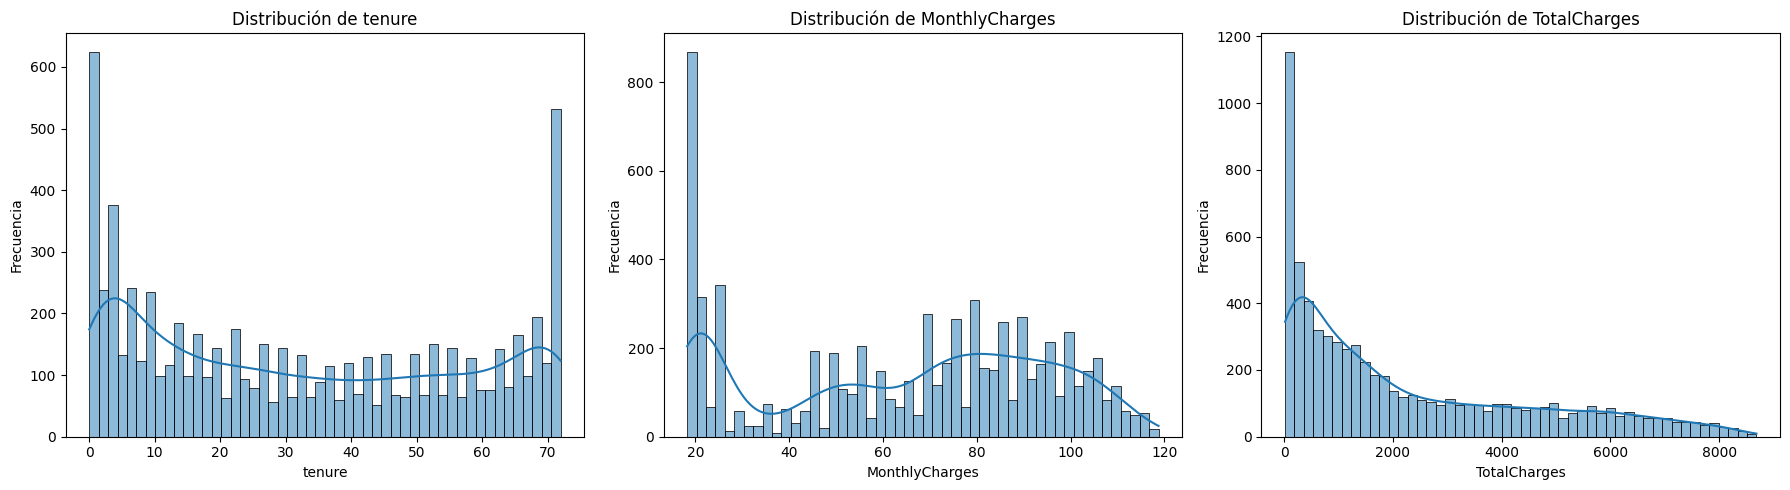

In [9]:
# Grafiquemos la distribución de todas las columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(numeric_cols):
	distribution_numeric_column(df, col, ax=ax[i])

plt.tight_layout()
plt.show()

En general, se observa que **muchos clientes tienen un tiempo de permanencia corto** y que **los cargos mensuales suelen ser bajos**, aunque también existe una proporción considerable de clientes con cargos medios y altos. La variable `TotalCharges` refleja este patrón con una gran concentración en valores bajos, lo cual sugiere que gran parte de los clientes han estado poco tiempo con la empresa o han generado pocos ingresos acumulados.

### Distribución de variables categóricas

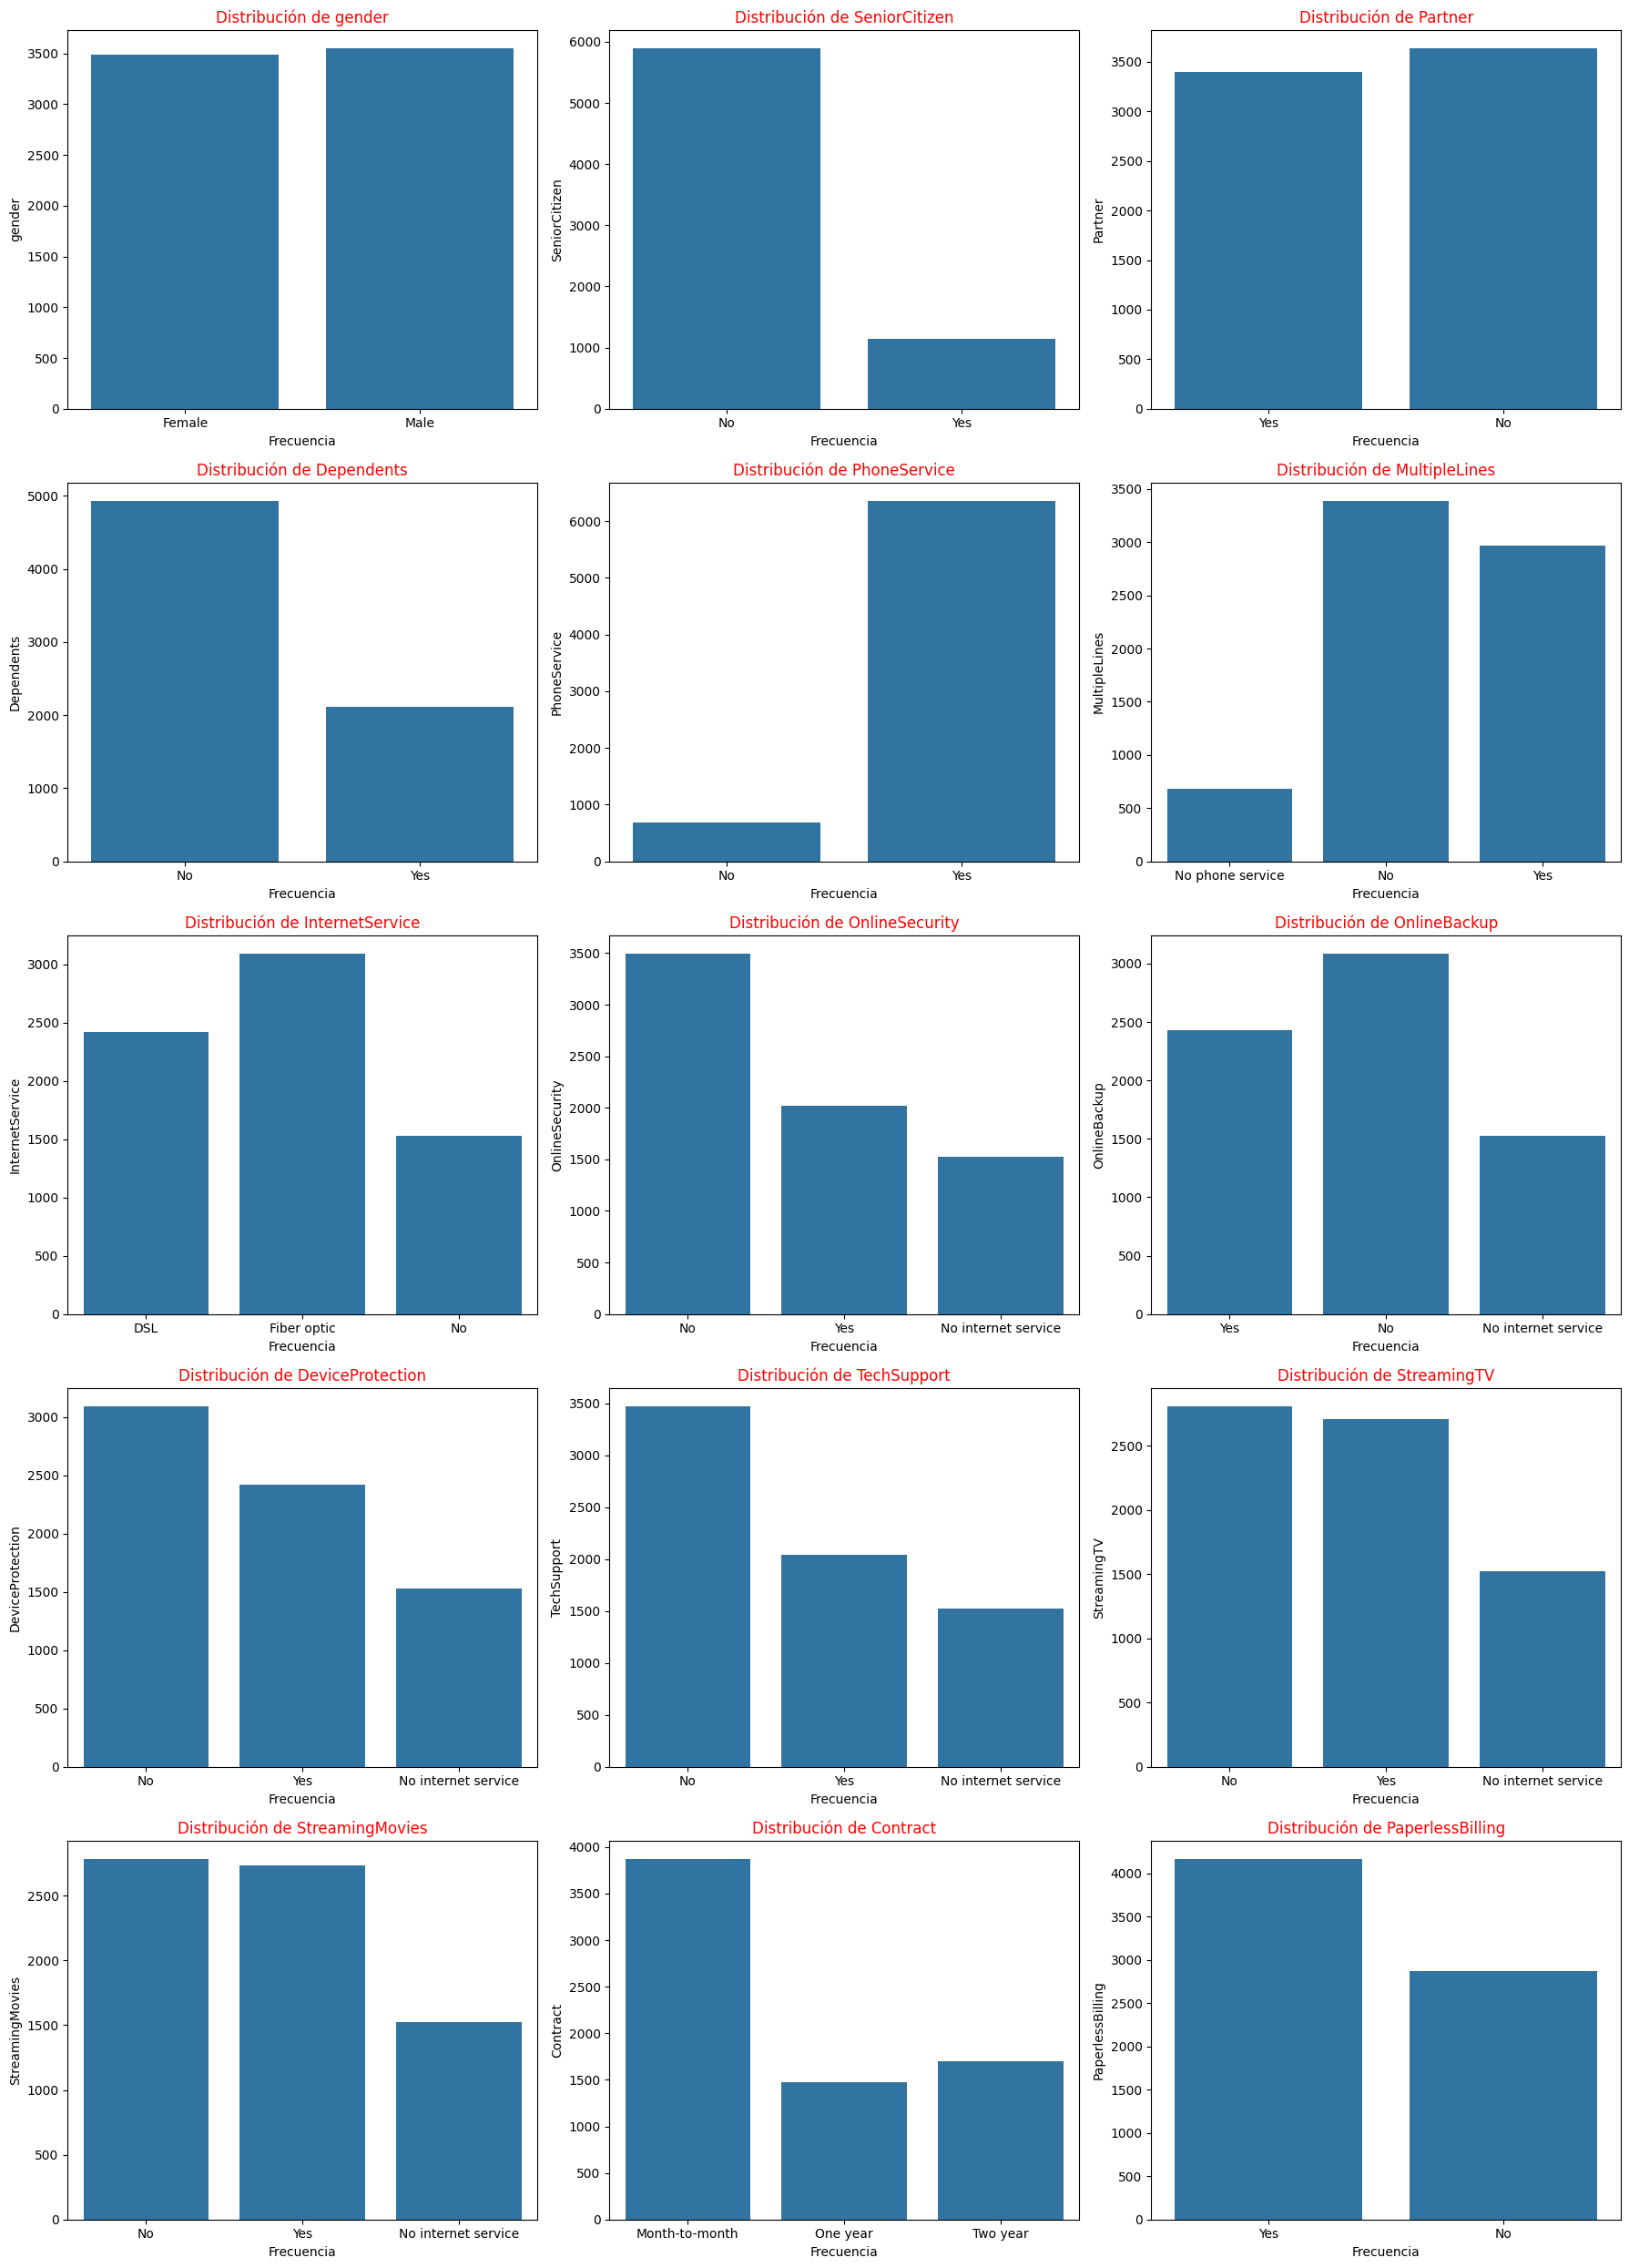

In [10]:
# Grafiquemos la distribución de de todas las columnas feature categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('PaymentMethod')
categorical_cols.remove('Churn')

fig, ax = plt.subplots(5, 3, figsize=(18, 25))
for i, col in enumerate(categorical_cols):
	row = i // 3
	col_idx = i % 3
	distribution_categorical_column(df, col, ax=ax[row, col_idx])

plt.tight_layout()
plt.show()

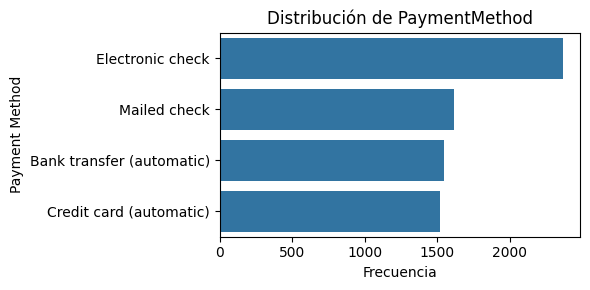

In [11]:
# Graficamos la distribución de la columna PaymentMethod (sus etiquetas son muy largas)
fig, ax = plt.subplots(figsize=(6, 3))
ax = sns.countplot(y='PaymentMethod', data=df)
ax.set_title('Distribución de PaymentMethod')
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Payment Method')
plt.tight_layout()
plt.show()

De estas gráficas se puede concluir que:
- La mayoría de las variables categóricas presentan una distribución **desequilibrada**.
- `gender` muestra una **distribución bastante equilibrada** entre "Male" y "Female".
- En la variable `Contract`, se observa una **preferencia clara por contratos mensuales**, con mucha menor frecuencia para contratos de uno o dos años.
- `PaperlessBilling` tiene una mayoría significativa de usuarios que sí utilizan esta modalidad.
- Finalmente, en `PaymentMethod`, el método más común es el **Electronic check**, seguido por los métodos automáticos (transferencia bancaria y tarjeta de crédito) y por último el `Mailed check`.


### Distribución de la variable objetivo `Churn`

C:\Users\andy-\AppData\Local\Temp\ipykernel_22144\255711473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Churn', palette='Set2')


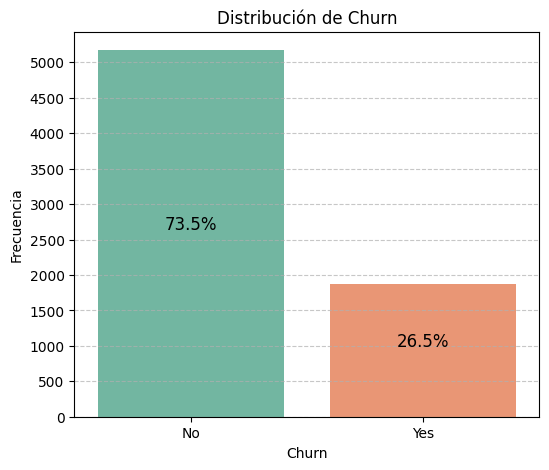

In [12]:
# Veamos la distribución de la columna Churn
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='Churn', palette='Set2')
total = len(df)
for p in ax.patches:
	count = int(p.get_height())
	percentage = 100 * count / total
	ax.annotate(f'{percentage:.1f}%', 
						(p.get_x() + p.get_width() / 2, p.get_height() / 2), 
						ha='center', va='bottom', fontsize=12)
ax.set_title('Distribución de Churn')
ax.set_xlabel('Churn')
ax.set_ylabel('Frecuencia')
ax.set_yticks(np.arange(0, 5500, step=500))
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

La clase es muy desbalanceada, con un 73.5% de clientes que no han abandonado la compañía y un 26.5% que sí lo han hecho.

## 2.4 Visualización de relaciones

### Funciones para graficar

In [13]:
# Función para graficar la 
def distribution_numeric_column_by_churn(df, colname, ax):
	sns.histplot(data=df, x=col, hue='Churn', 
              bins=30, kde=False, ax=ax, element='step', stat='density', common_norm=False)
	ax.set_title(f'Distribución de {colname} por Churn')
	ax.set_xlabel(colname)
	ax.set_ylabel('Densidad')

# Función para graficar la distribución de una columna categórica
def distribution_categorical_column_by_churn(df, colname, ax):
	sns.countplot(data=df, x=col, hue='Churn', ax=ax)
	ax.set_title(f'Distribución de {colname}', color='red')
	ax.set_xlabel('Frecuencia')
	ax.set_ylabel(colname)

### Relaciones de variables numéricas con Churn

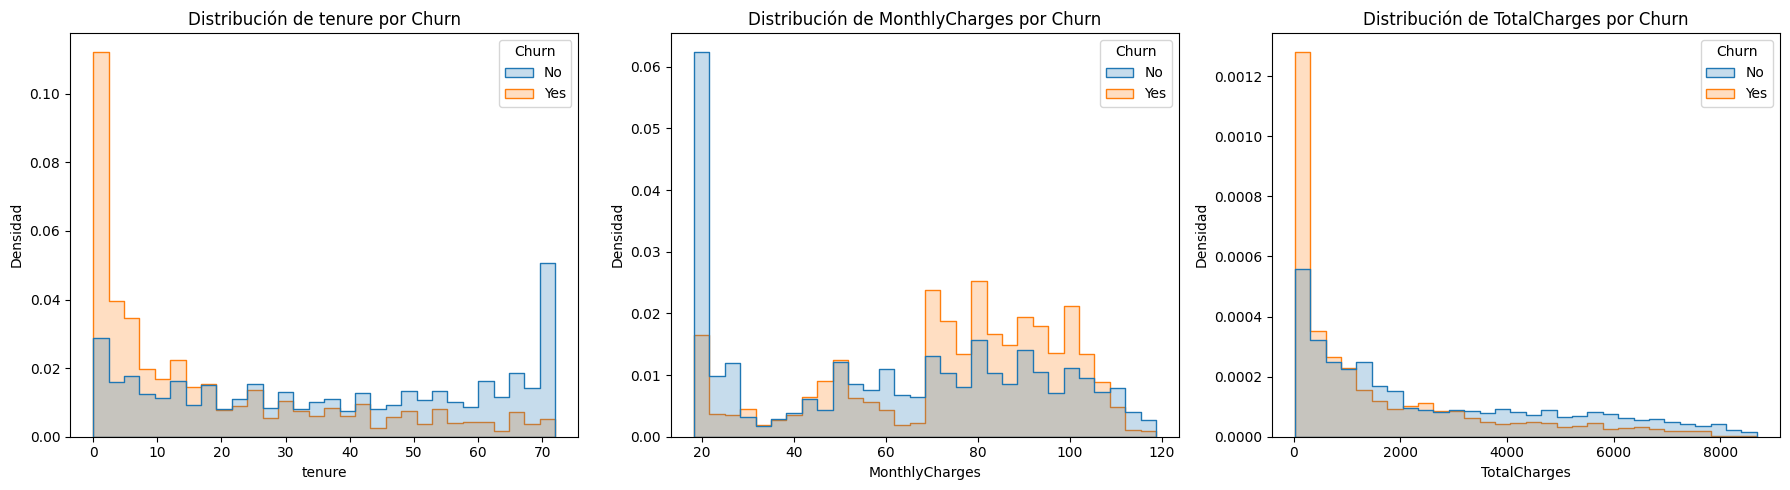

In [14]:
# Relación de las columnas numéricas con Churn
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(numeric_cols):
	distribution_numeric_column_by_churn(df, col, ax=ax[i])

plt.tight_layout()
plt.show()

A continuación se presentan las conclusiones obtenidas al analizar las distribuciones de las tres variables numéricas, diferenciadas por la clase de `Churn`:

1. **`tenure`**: La distribución muestra que los clientes que abandonan el servicio se concentran mayoritariamente en los primeros meses de relación, mientras que aquellos con mayor antigüedad presentan tasas de abandono mucho menores. Esto sugiere que el churn ocurre principalmente en las etapas tempranas del ciclo del cliente.

2. **`MonthlyCharges`**: Se observa que los clientes que abandonan el servicio suelen tener cargos mensuales más altos, especialmente entre 70 y 100 USD, mientras que aquellos que permanecen se concentran en rangos más bajos, entre 20 y 40 USD. Esto sugiere que los servicios más costosos podrían estar relacionados con un mayor riesgo de churn.


3. **`TotalCharges`**: Los clientes que abandonan el servicio presentan cargos totales acumulados considerablemente más bajos, en su mayoría por debajo de 2000 USD, lo cual es coherente con un menor tiempo de permanencia. En contraste, los clientes leales se distribuyen a lo largo de todo el rango de valores. Esto refuerza la idea de que el abandono ocurre antes de que los usuarios generen cargos significativos.

En resumen, los clientes que han estado poco tiempo, pagan más mensualmente y han acumulado menos gastos, son **los más propensos a abandonar el servicio**.


### Relaciones de variables categóricas con Churn

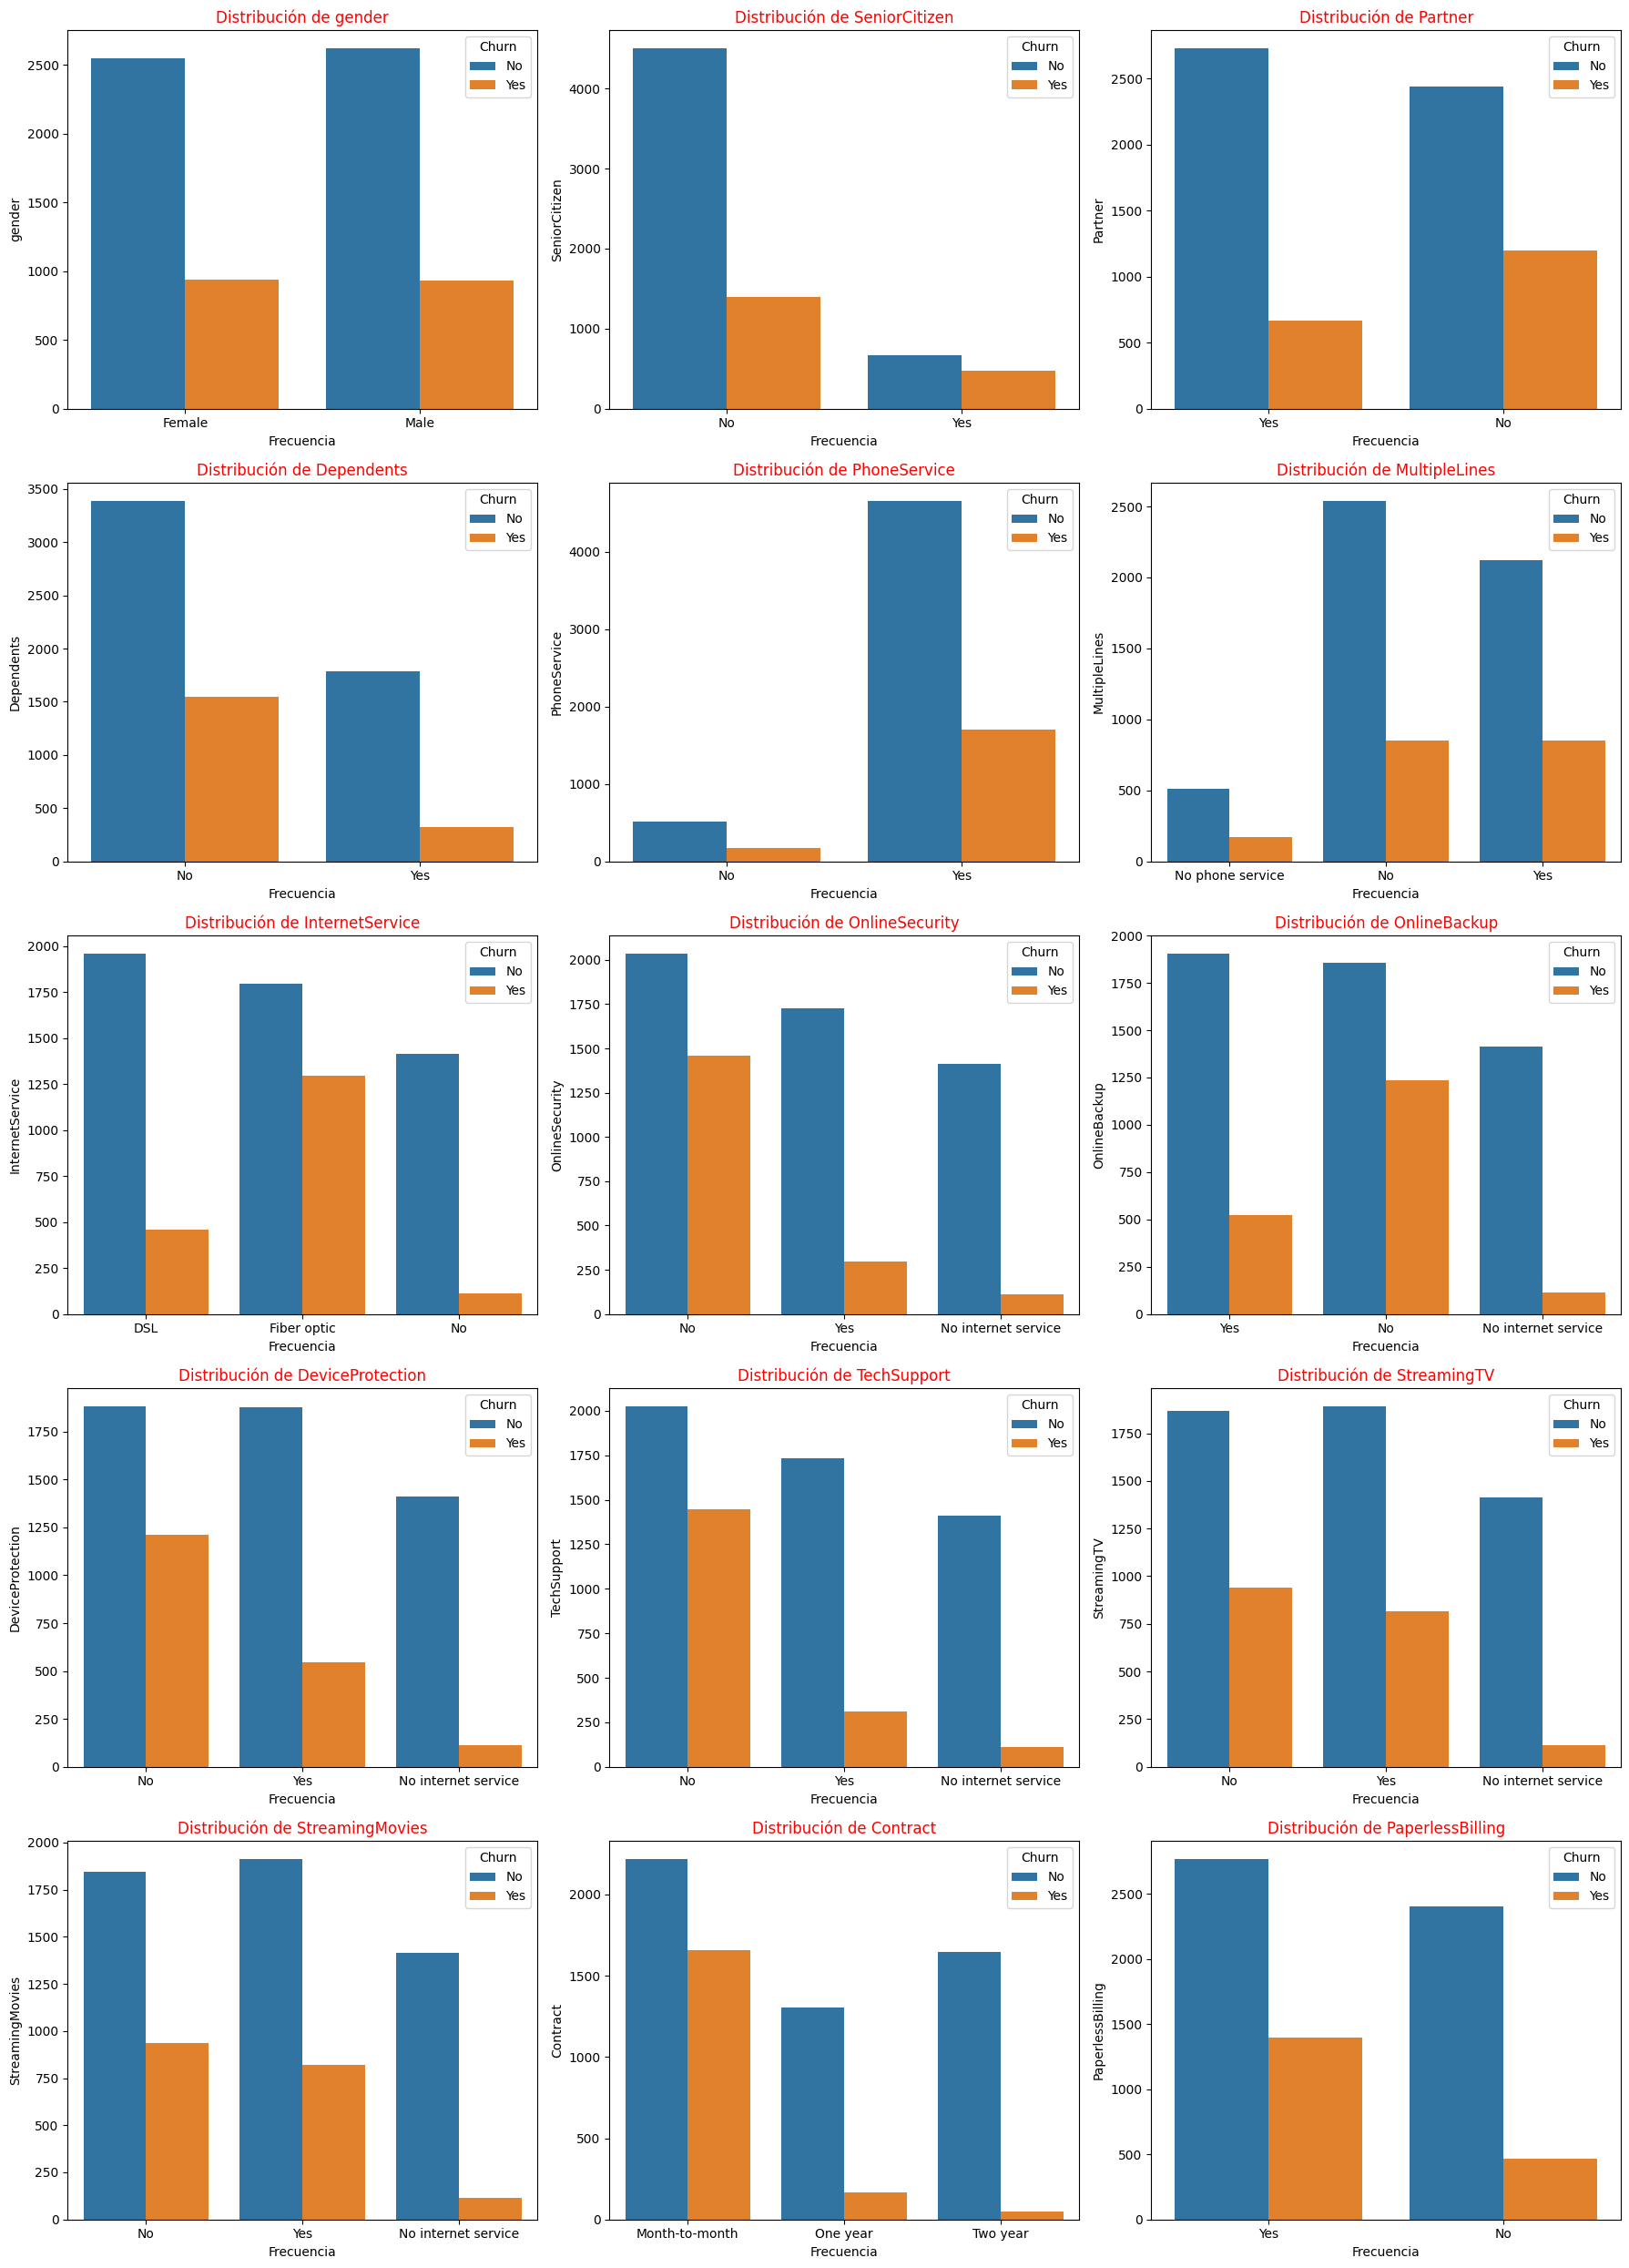

In [15]:
# Relación de las columnas categóricas con Churn
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('PaymentMethod')
categorical_cols.remove('Churn')

fig, axes = plt.subplots(5, 3, figsize=(18, 25))

for i, col in enumerate(categorical_cols):
	row = i // 3
	col_idx = i % 3
	distribution_categorical_column_by_churn(df, col, ax=axes[row, col_idx])

plt.tight_layout()
plt.show()

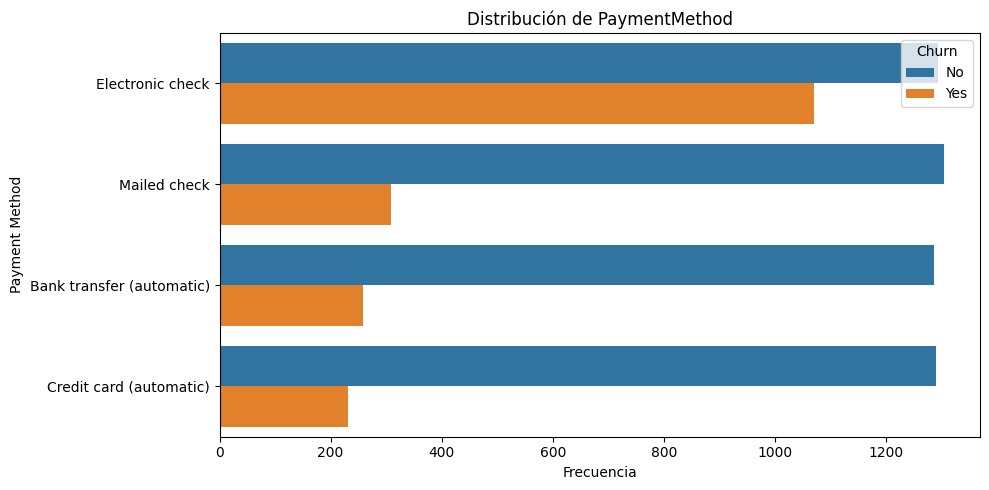

In [16]:
# Graficamos la distribución de la columna PaymentMethod (sus etiquetas son muy largas)
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(y='PaymentMethod', data=df, hue='Churn')
ax.set_title('Distribución de PaymentMethod')
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Payment Method')
plt.tight_layout()
plt.show()

De las gráficas se puede concluir lo siguiente:

- Variables como `PhoneService`, `Partner`, `Dependents`, y `PaperlessBilling` presentan una mayor proporción de **clientes que no abandonan**.
- El **churn es visiblemente más alto** entre los clientes con **contratos mensuales**, lo cual sugiere menor compromiso con la empresa. En contraste, los contratos de uno o dos años tienen tasas de abandono considerablemente menores.
- En servicios relacionados con soporte y seguridad (`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`), se observa que los clientes que **no tienen estos servicios** presentan **tasas de churn más altas**, lo que sugiere una posible conexión entre la falta de servicios adicionales y la insatisfacción del cliente.
- Entre los clientes que usan **fibra óptica**, la proporción de churn es más alta en comparación con quienes tienen DSL o no tienen internet. Esto puede deberse a expectativas más altas no satisfechas o a mayor costo.
- En `PaymentMethod`, el churn es **notablemente mayor** entre quienes utilizan **"Electronic check"**, mientras que métodos automáticos como tarjeta de crédito o transferencia bancaria están más asociados a clientes que permanecen.
- En `gender`, no se observan diferencias significativas entre hombres y mujeres con respecto al churn.
- En `SeniorCitizen`, los adultos mayores tienen una **ligera mayor proporción de churn**, aunque no tan marcada como en otras variables.

En resumen, el churn tiende a estar asociado con **contratos flexibles, servicios básicos sin protecciones adicionales, y métodos de pago manuales**. En cambio, los clientes con contratos a largo plazo, servicios de respaldo y métodos automáticos de pago muestran mayor fidelidad. Estas variables categóricas aportan información valiosa para predecir la probabilidad de abandono y diseñar estrategias de retención personalizadas.


### Guardamos el dataset antes de las transformaciones

In [17]:
df.to_csv('pre_transformed_data.csv', index=False)

El trabajo continua en el siguiente notebook `modelos.ipynb` usando el dataset `pre_transformed_data.csv` que contiene las transformaciones realizadas en este notebook.

Esta división se realiza para que este notebook solo muestre el EDA (sin el procesamiento profundo de datos con transformadores personalizados y pipelines).